# Netflix Movie Data



In [28]:
# Load packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.graph_objects as go
import plotly.express as px

## Load your data

In [30]:
# Load data from the csv file
netflix = pd.read_csv('netflix_dataset.csv', index_col=0)
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Understand your variables

In [31]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(netflix.columns):
    variables.loc[i] = [var, netflix[var].nunique(), netflix[var].unique().tolist()]
    
variables

,Variable,Number of unique values,Values
0,type,2,"[TV Show, Movie]"
1,title,7787,"[3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19..."
2,director,4049,"[nan, Jorge Michel Grau, Gilbert Chan, Shane A..."
3,cast,6831,"[João Miguel, Bianca Comparato, Michel Gomes, ..."
4,country,681,"[Brazil, Mexico, Singapore, United States, Tur..."
5,date_added,1565,"[August 14, 2020, December 23, 2016, December ..."
6,release_year,73,"[2020, 2016, 2011, 2009, 2008, 2019, 1997, 201..."
7,rating,14,"[TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y..."
8,duration,216,"[4 Seasons, 93 min, 78 min, 80 min, 123 min, 1..."
9,listed_in,492,"[International TV Shows, TV Dramas, TV Sci-Fi ..."


## Answering these questions :

- 1. How do the variables correlate?
- 2. Which countries have contributed most movies in recent years?
- 3. Which actors are most likely to work together?

## Data Preprocessing

#### 1. Dealing with Missing data

In [32]:
# Checking datatype and missing values

netflix.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s7787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 730.0+ KB


In [33]:
# Checking the proportion of missing values in each column

for i in netflix.columns:
    missing_prop = netflix[i].isna().sum() / netflix.shape[0] * 100
    if missing_prop > 0:
        print(i, ': {:.2f}'.format(missing_prop))       
    

director : 30.68
cast : 9.22
country : 6.51
date_added : 0.13
rating : 0.09


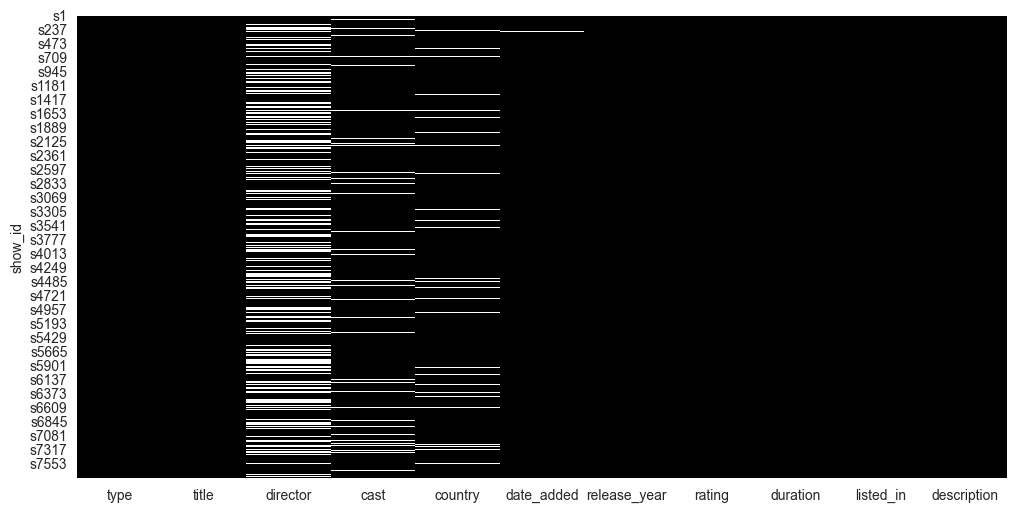

In [34]:
plt.figure(figsize=(12,6) , dpi=100)
sns.heatmap(netflix.isna(), cmap='binary_r', cbar = False)
plt.show()

Columns with missing values are 'director', 'cast', 'country', 'date_added', 'rating'.

Columns with substantial proportion of missing values are 'director', 'cast', 'country'



In [35]:
netflix['rating'].replace(np.nan, netflix.rating.mode()[0], inplace=True)

netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')
netflix['year_added'] = netflix['date_added'].dt.year


C:\Users\HP\AppData\Local\Temp\ipykernel_19760\1459445763.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix['rating'].replace(np.nan, netflix.rating.mode()[0], inplace=True)


### Acknowledgements

Dataset source: [Kaggle](https://www.kaggle.com/shivamb/netflix-shows)

# Duration of the movies and TV Shows

In [36]:
nf_movies = netflix[netflix['type'] == 'Movie']
print('Number of movies in the dataset : ', nf_movies.shape[0])

nf_tv = netflix[netflix['type'] == 'TV Show']
print('Number of TV Shows in the dataset : ', nf_tv.shape[0])

Number of movies in the dataset :  5377
Number of TV Shows in the dataset :  2410


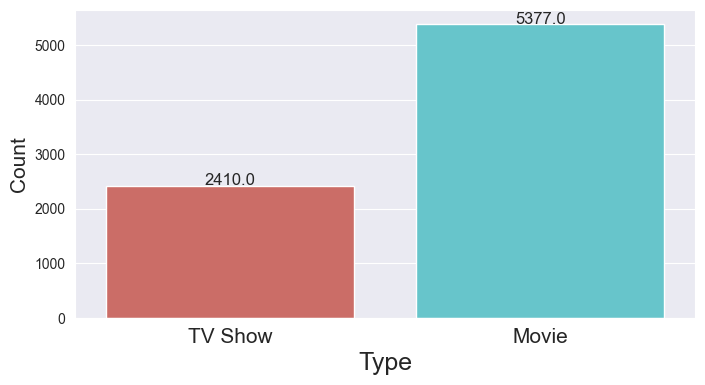

In [37]:
plt.figure(figsize=(8,4), dpi=100)
graph = sns.countplot(x='type',data = netflix, palette='hls')
plt.xticks(fontsize = 15)
plt.xlabel('Type', fontsize = 18)
plt.ylabel('Count', fontsize = 15)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 20, height , ha="center", fontsize=12)
    
plt.show()

In [38]:
nf_movies['duration'] = nf_movies['duration'].str.replace(' min', '')
duration = nf_movies['duration'].astype('int64')

duration.describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_19760\2079288853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_movies['duration'] = nf_movies['duration'].str.replace(' min', '')


count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

f:\maidan\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


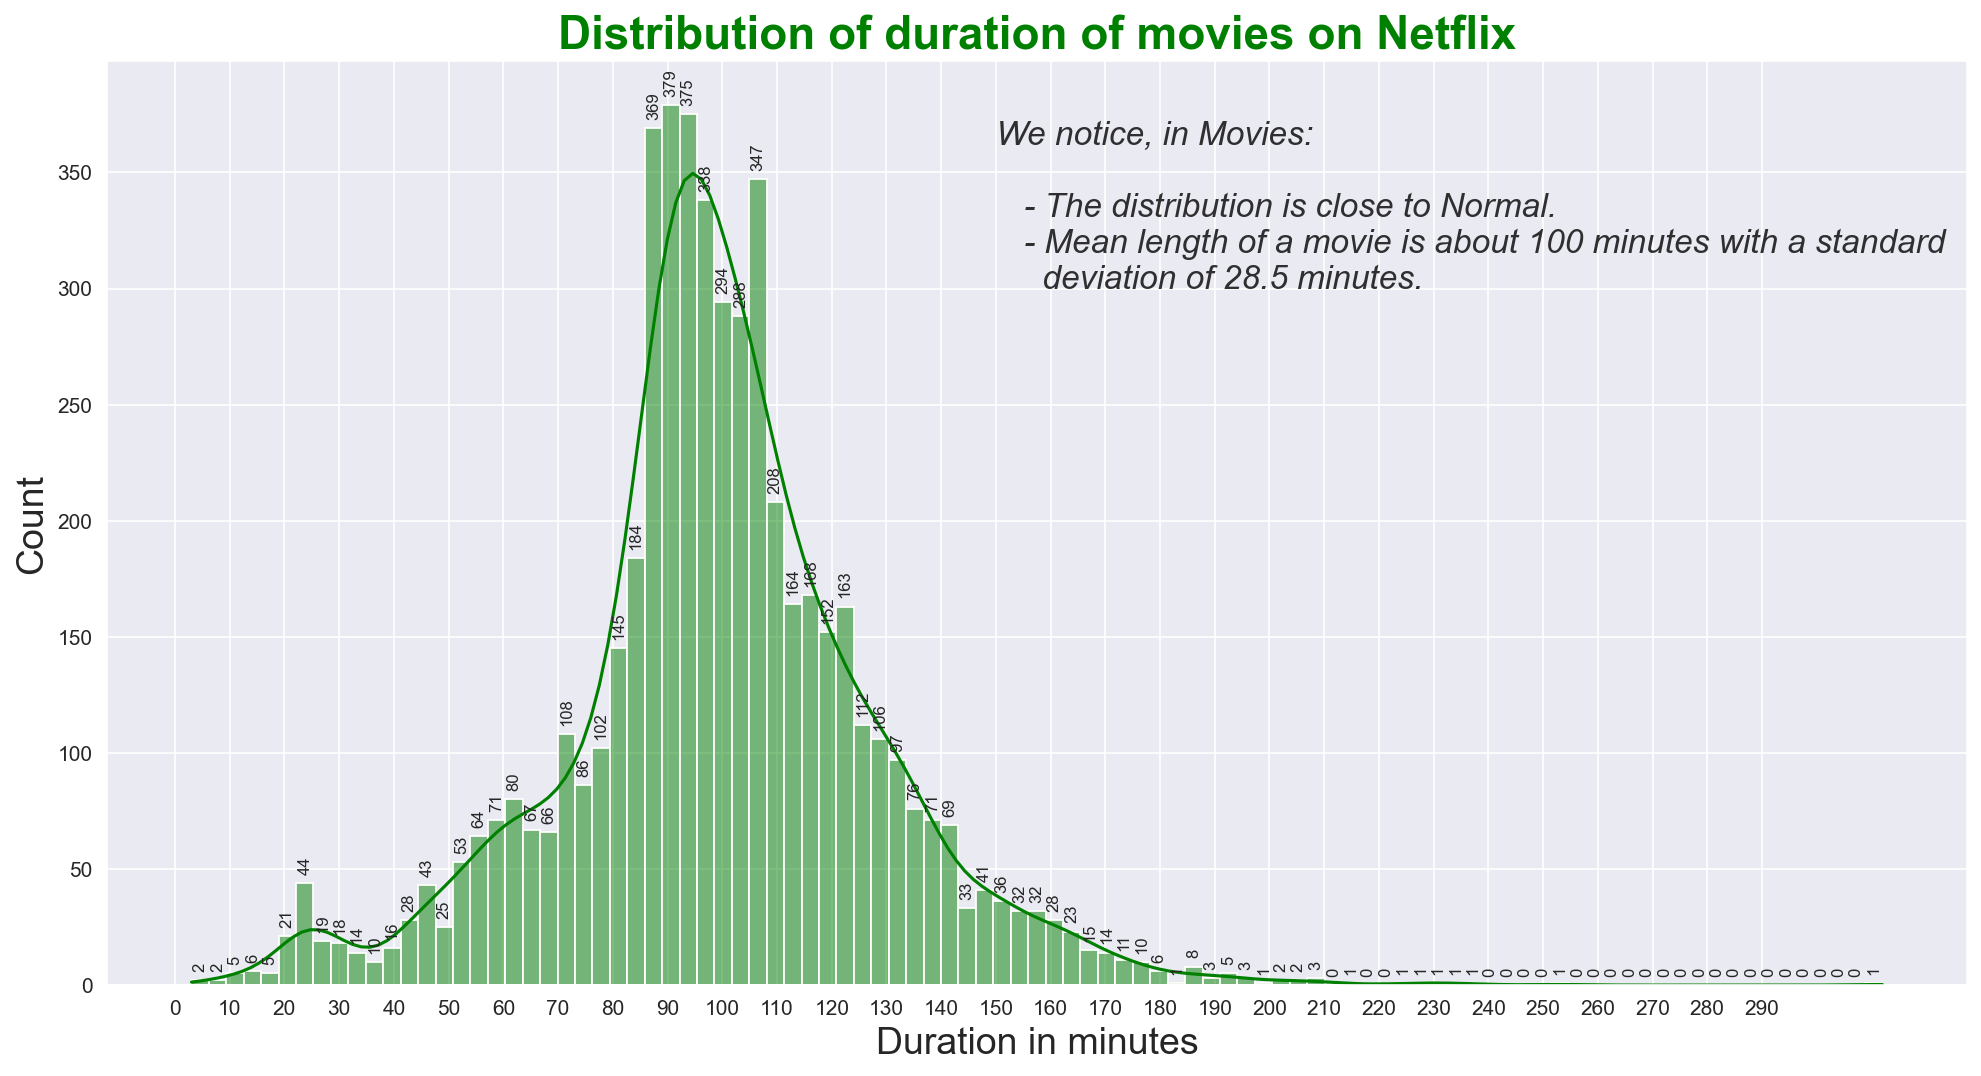

In [39]:
plt.figure(figsize=(16, 8), dpi=150)

graph = sns.histplot(duration, color='g', kde=True)
plt.xlabel('Duration in minutes', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Distribution of duration of movies on Netflix', fontsize=22, weight='semibold', color='g')
plt.xticks(range(0, 300, 10), rotation=0)

text1 = 'We notice, in Movies:\n\n   - The distribution is close to Normal.\n   - Mean length of a movie is about 100 minutes with a standard\n     deviation of 28.5 minutes.'
plt.text(150, 300, text1, horizontalalignment='left', fontsize=16, color='black', alpha=0.8, fontstyle='italic')

# Adding text for the bars using plt.text
for patch in graph.patches:
    height = patch.get_height()
    plt.text(
        patch.get_x() + patch.get_width() / 2,  # X-coordinate
        height + 5,  # Y-coordinate (above the bar)
        int(height),  # Text to display
        ha='center', fontsize=8, rotation=90
    )

plt.show()

f:\maidan\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


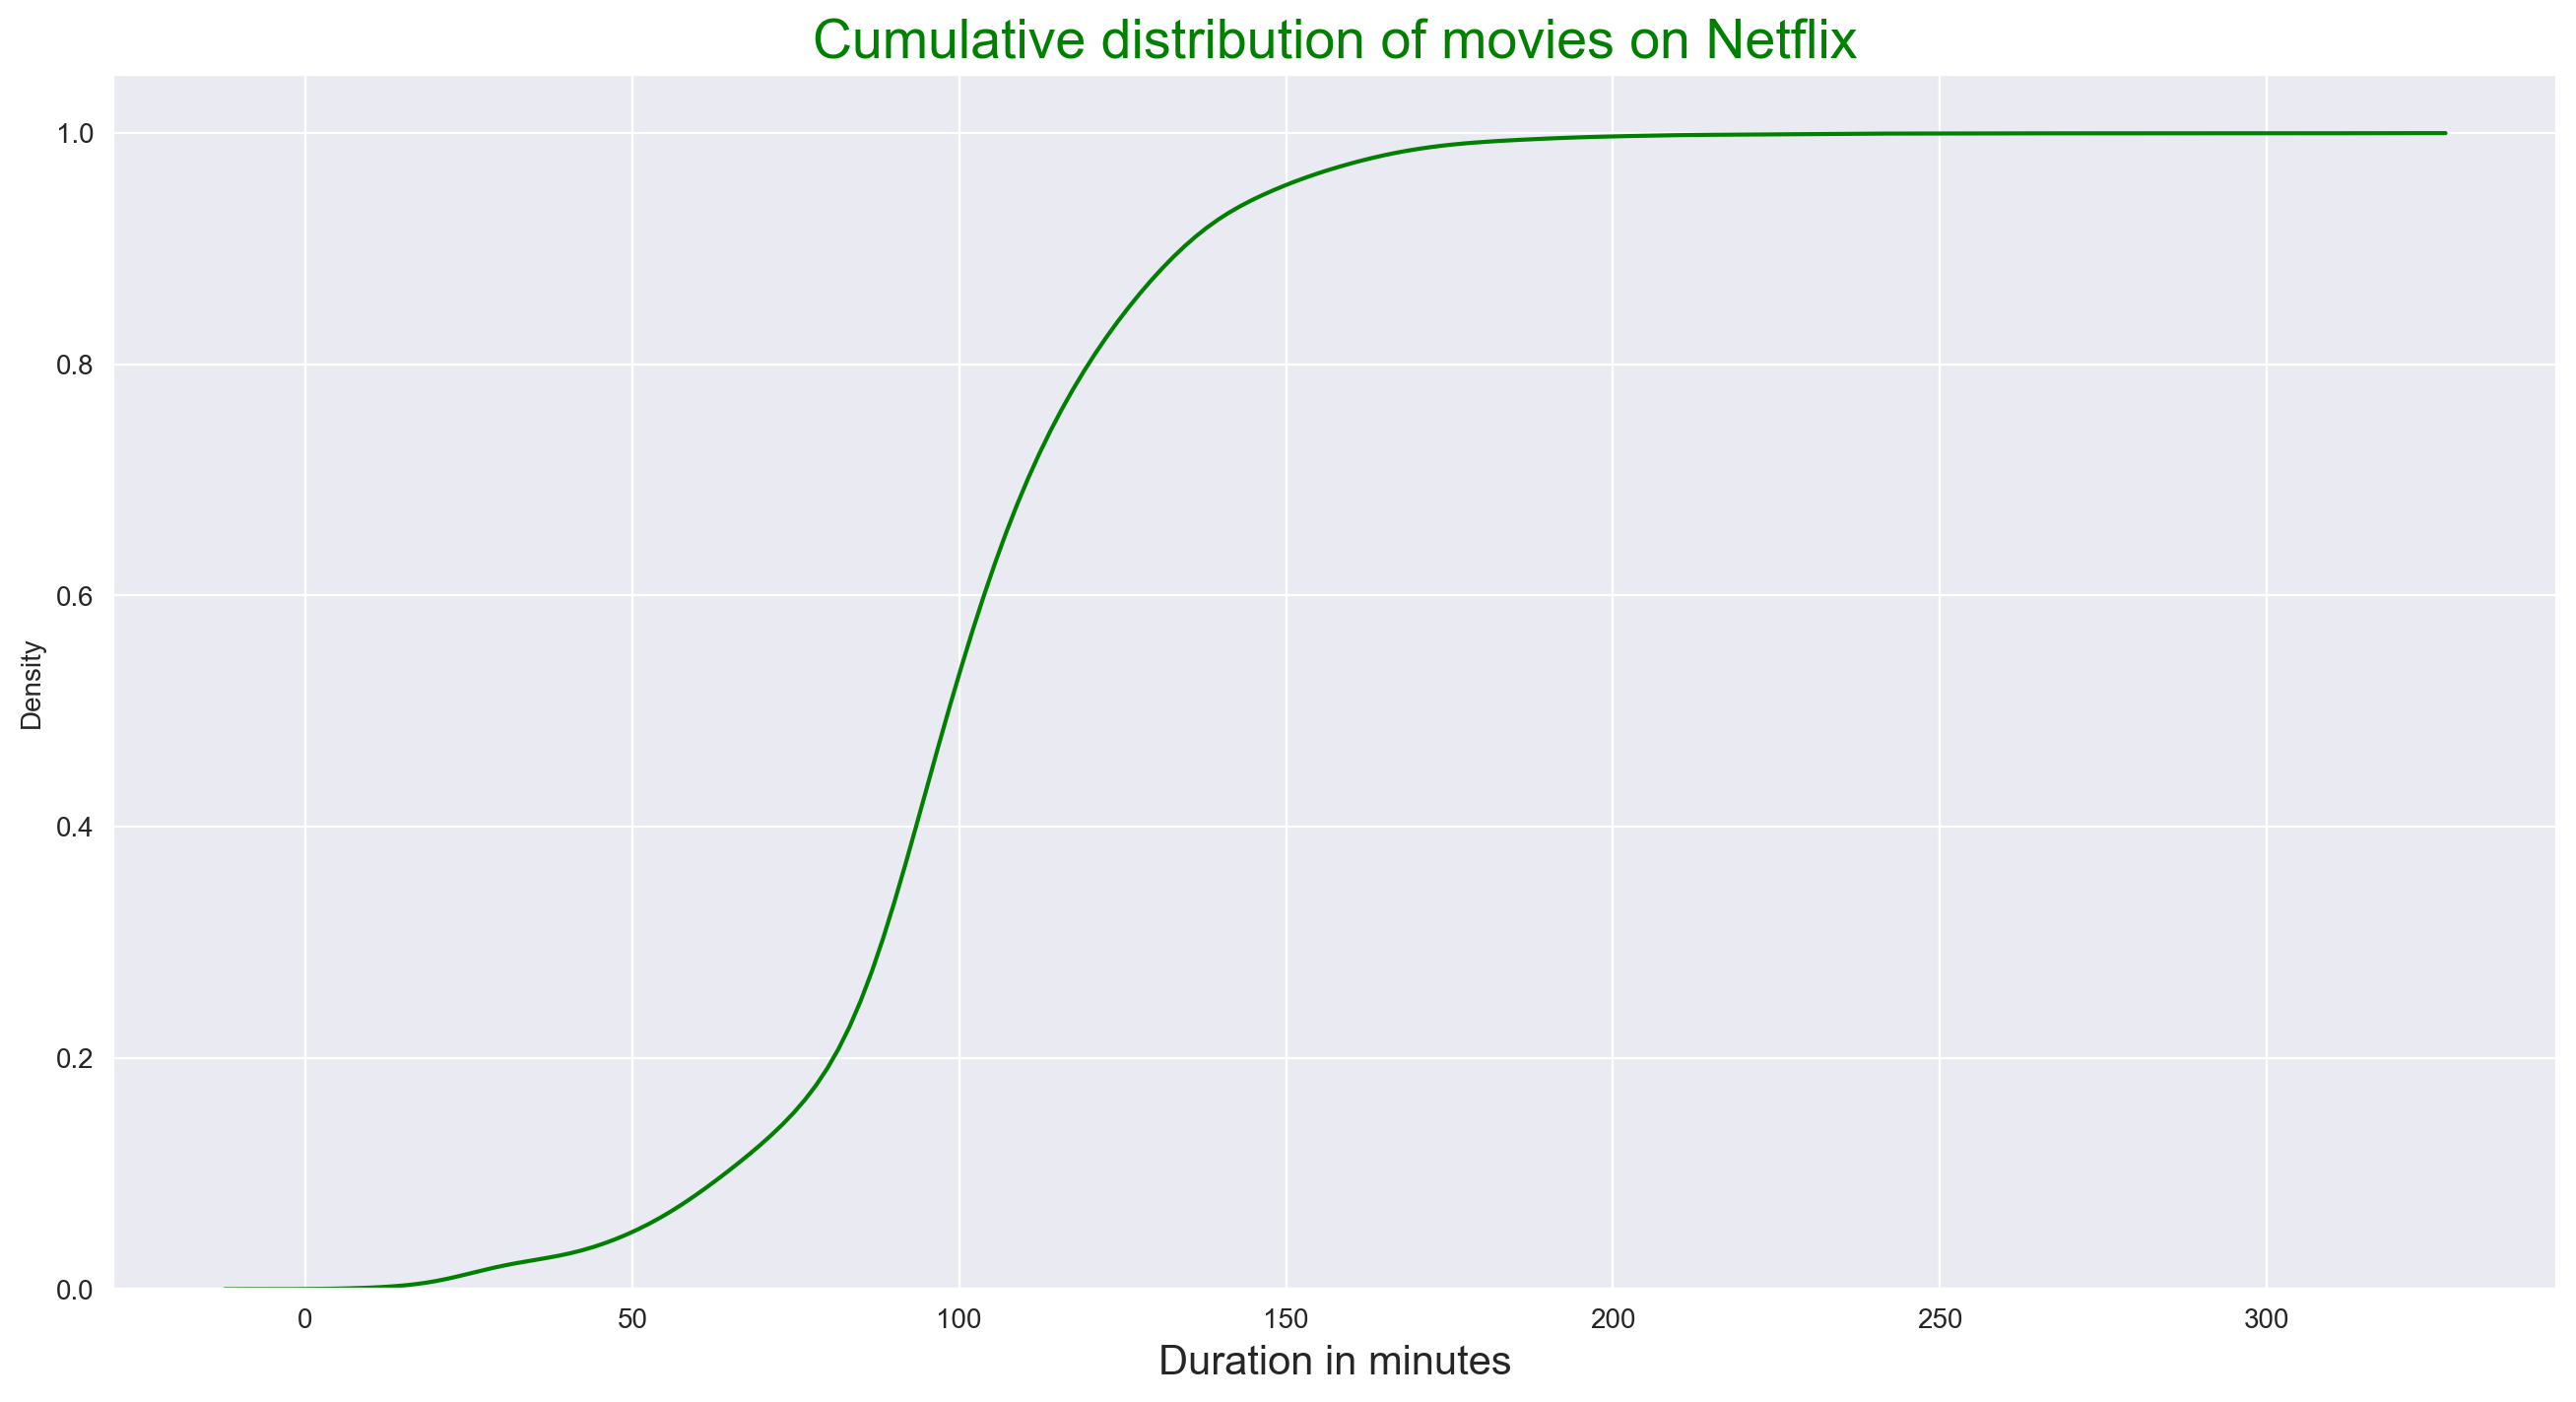

In [40]:
plt.figure(figsize=(16,8), dpi=200)
sns.kdeplot(duration, cumulative=True, color='g')
plt.xlabel('Duration in minutes', fontsize=15)
plt.title('Cumulative distribution of movies on Netflix', fontsize=20).set_color('g')
plt.show()

In [41]:
nf_tv['duration'] = nf_tv['duration'].str.replace(' Season', '')
nf_tv['duration'] = nf_tv['duration'].str.replace('s', '')
seasons = nf_tv['duration'].astype('int64')
seasons.describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_19760\3652570267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_tv['duration'] = nf_tv['duration'].str.replace(' Season', '')
C:\Users\HP\AppData\Local\Temp\ipykernel_19760\3652570267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_tv['duration'] = nf_tv['duration'].str.replace('s', '')


count    2410.000000
mean        1.775934
std         1.596359
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: duration, dtype: float64

In [42]:
nf_tv.duration.value_counts(normalize = True) * 100

duration
1     66.721992
2     15.850622
3      7.634855
4      3.609959
5      2.406639
6      1.244813
7      0.788382
8      0.746888
9      0.331950
10     0.248963
11     0.124481
13     0.082988
12     0.082988
15     0.082988
16     0.041494
Name: proportion, dtype: float64

f:\maidan\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


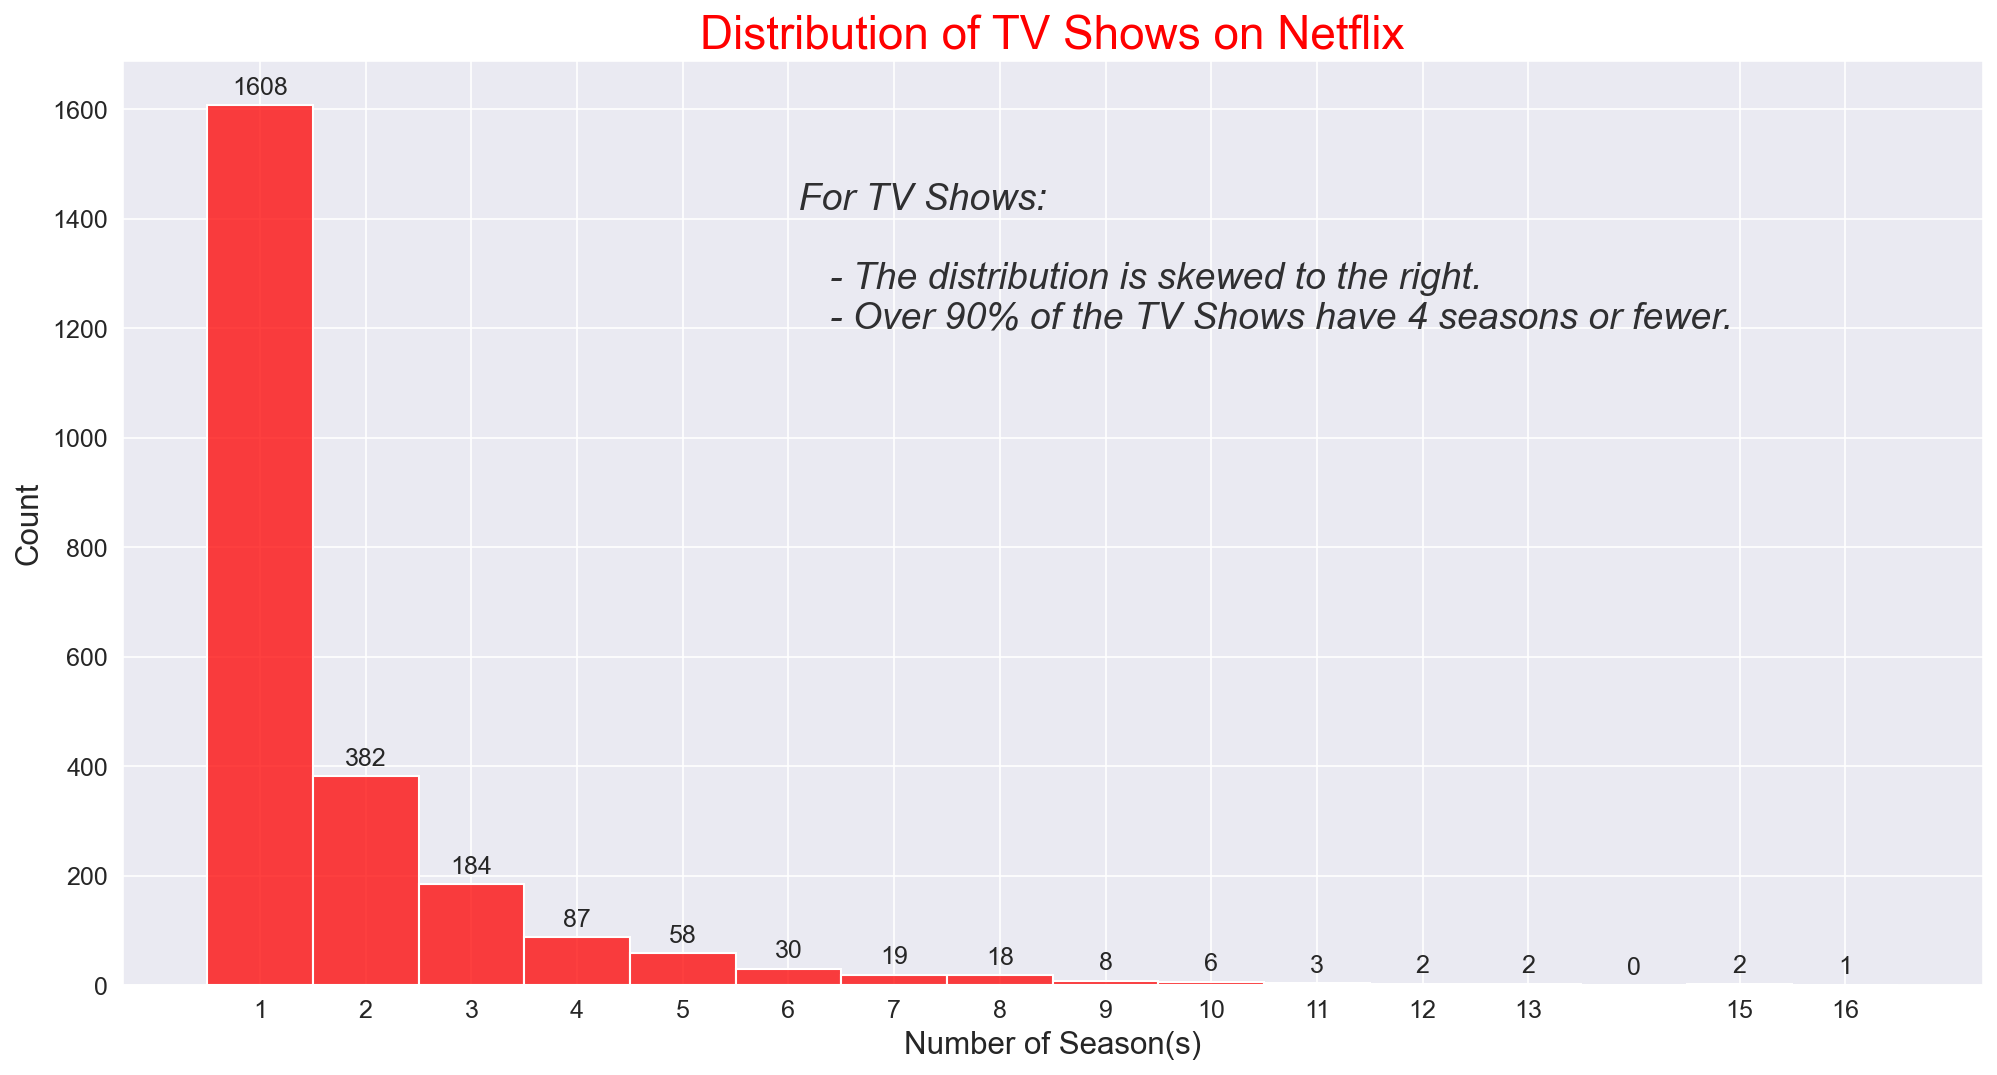

In [43]:
plt.figure(figsize=(16, 8), dpi=150)

graph = sns.histplot(seasons, bins=16, discrete=True, color='r')

plt.xticks(seasons.unique(), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Number of Season(s)', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of TV Shows on Netflix', fontsize=22).set_color('r')

# Add text above each bar
for p in graph.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2., height + 20, int(height), ha="center", fontsize=12)

# Add the summary text with corrected font parameters
text2 = ' For TV Shows:\n\n    - The distribution is skewed to the right.\n    - Over 90% of the TV Shows have 4 seasons or fewer.'
plt.text(6, 1200, text2, horizontalalignment='left', fontsize=18, color='black', alpha=0.8, fontstyle='italic')

plt.show()


f:\maidan\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


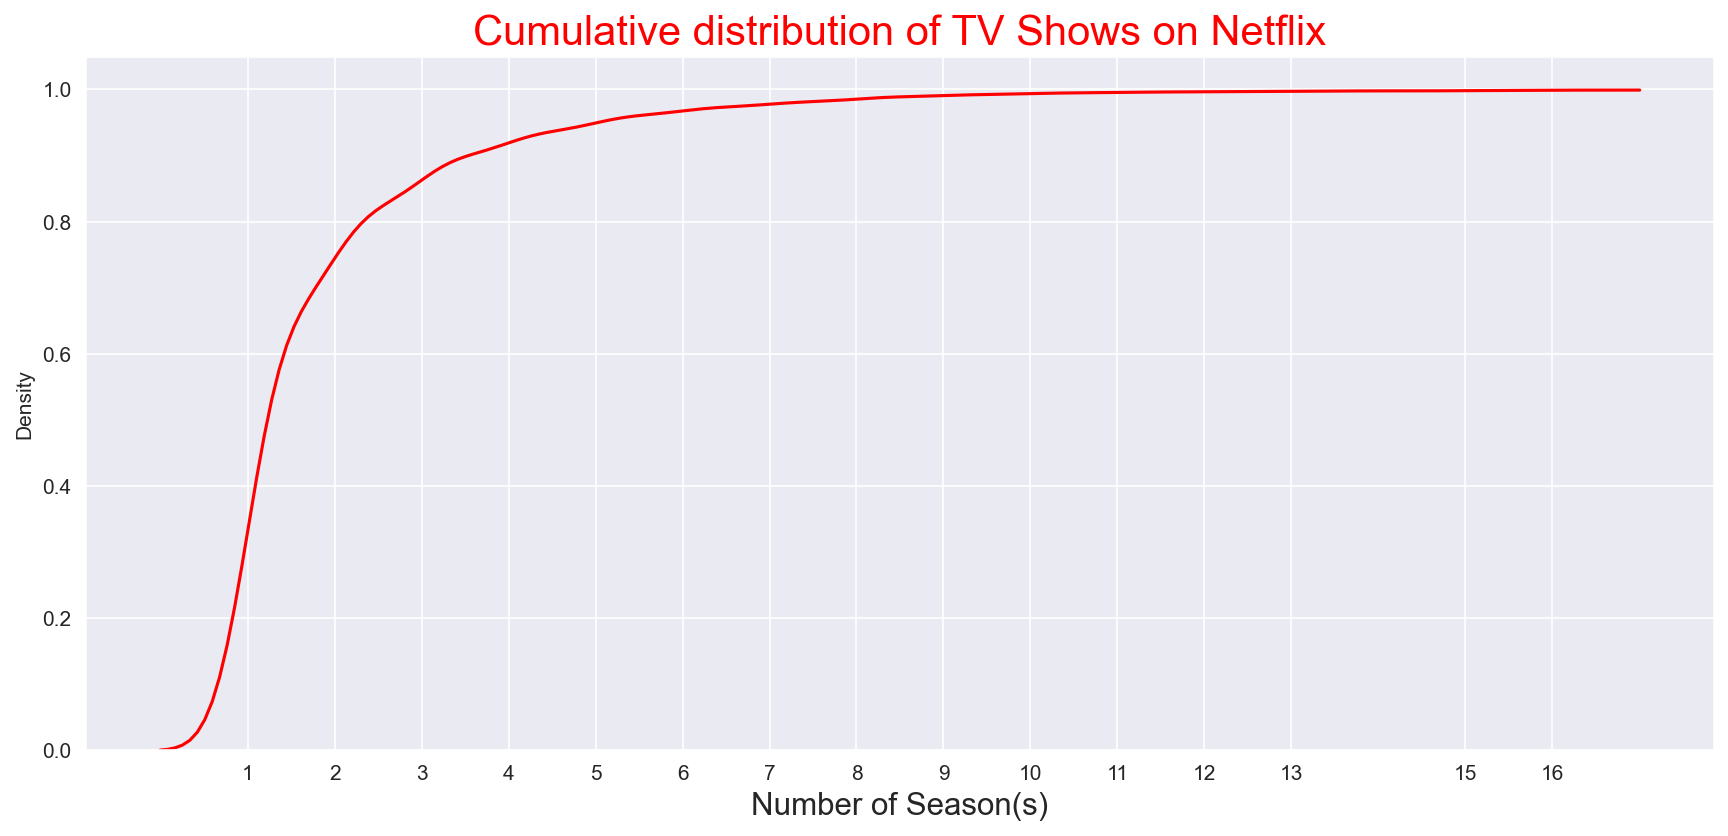

In [44]:
plt.figure(figsize=(14,6), dpi=150)

sns.kdeplot(seasons, cumulative=True, color='r')
plt.xticks(seasons.unique())
plt.xlabel('Number of Season(s)', fontsize=15)
plt.title('Cumulative distribution of TV Shows on Netflix', fontsize=20).set_color('r')
plt.show()

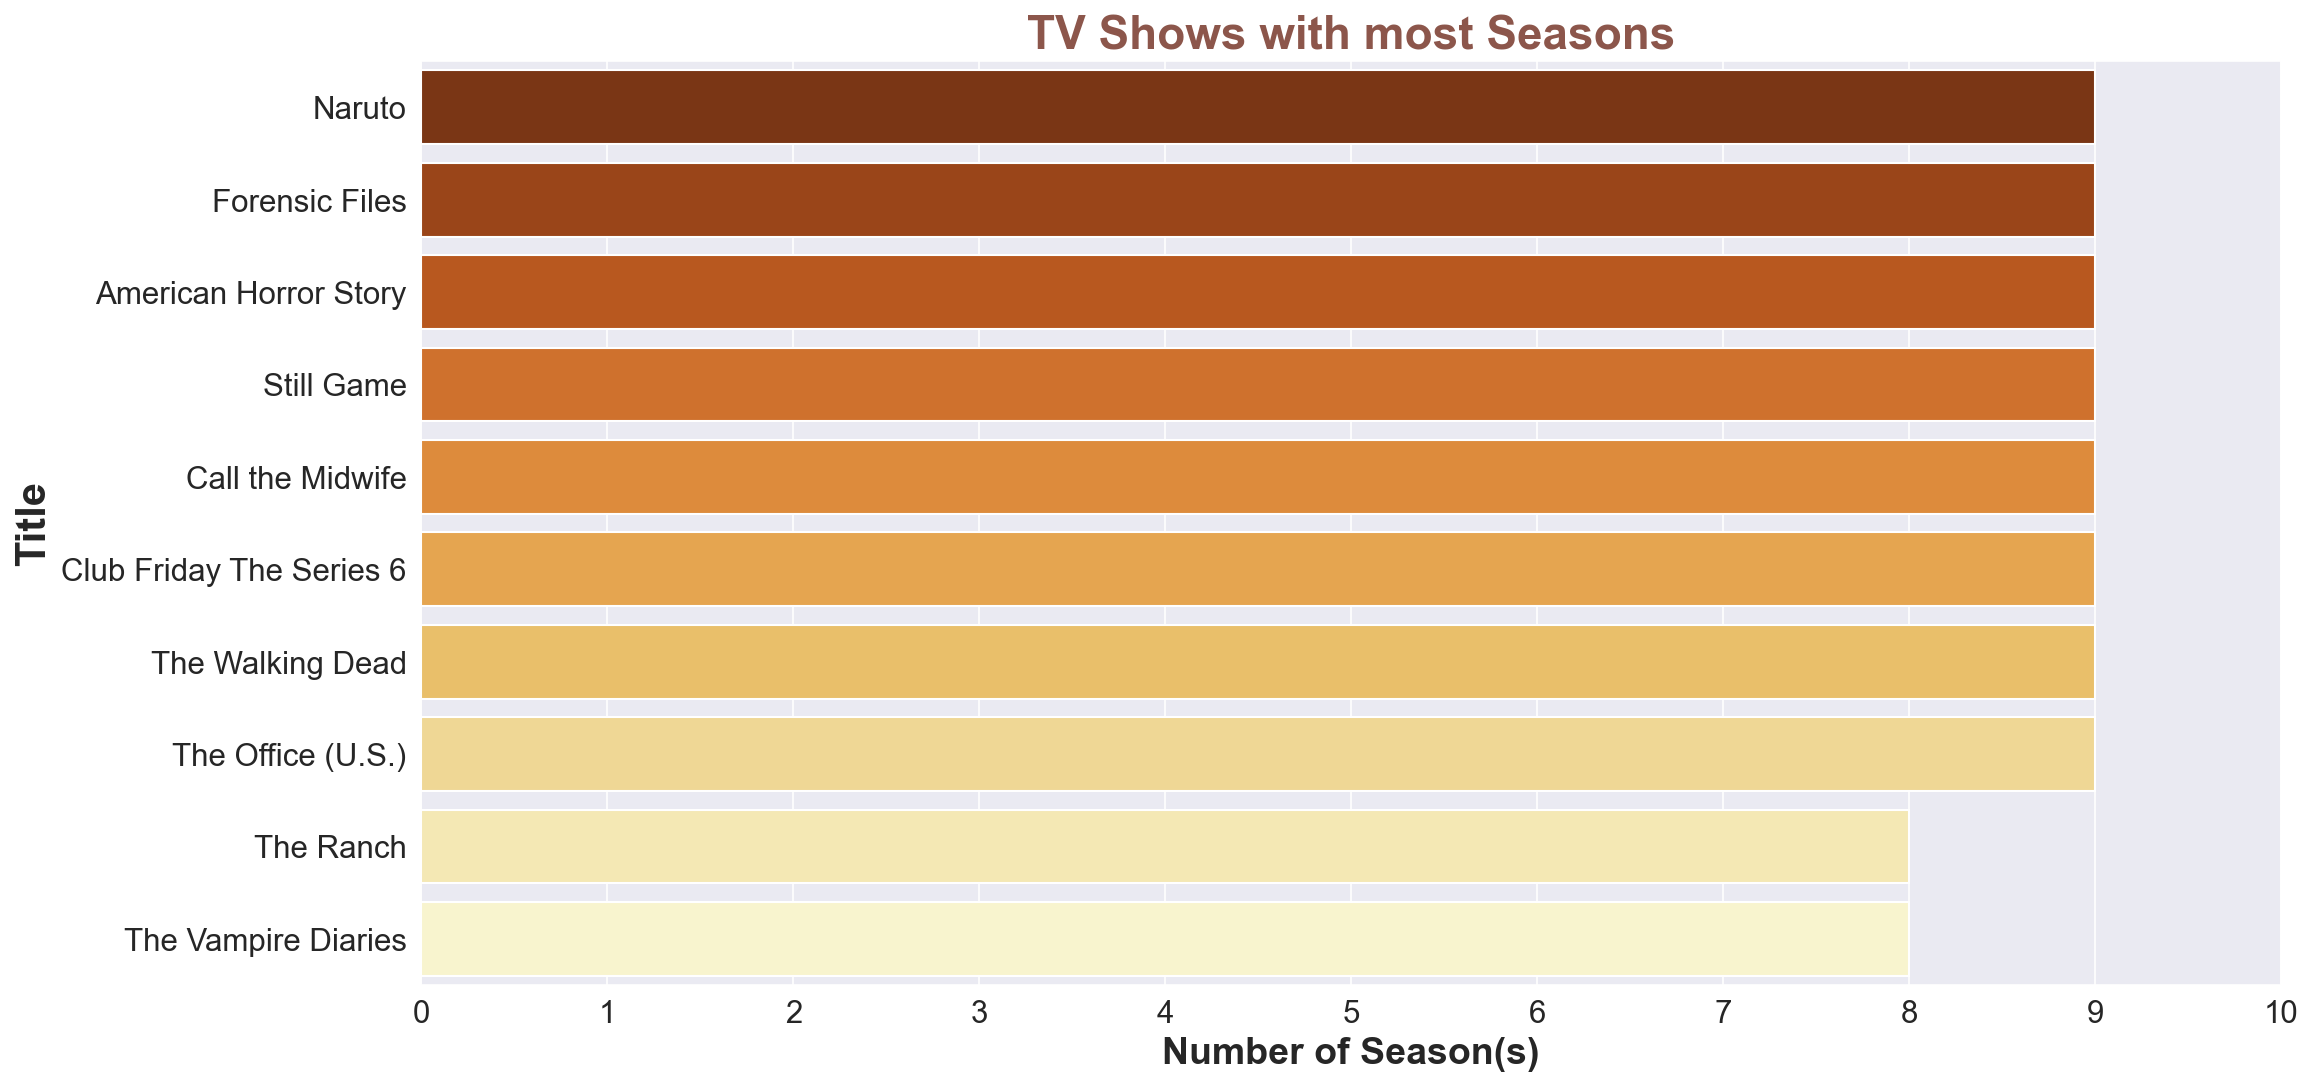

In [45]:
most_seasons = nf_tv[['duration', 'title']].sort_values('duration', ascending=False)[:10]
most_seasons['duration'] = most_seasons['duration'].astype('int64')

plt.figure(figsize=(16,8), dpi=150)

sns.barplot(data = most_seasons, y='title', x='duration', palette = 'YlOrBr_r')
plt.ylabel('Title', fontsize=20, weight='semibold')
plt.xlabel('Number of Season(s)', fontsize=18, weight='semibold')
plt.xticks(range(0,11), fontsize=15)
plt.yticks(fontsize=15)
plt.title('TV Shows with most Seasons', fontsize=22, weight='semibold', color='tab:brown')
plt.show()

## Rating

In [46]:
rat = netflix.groupby('rating')['rating'].count().sort_values(ascending=False)
rat

rating
TV-MA       2870
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

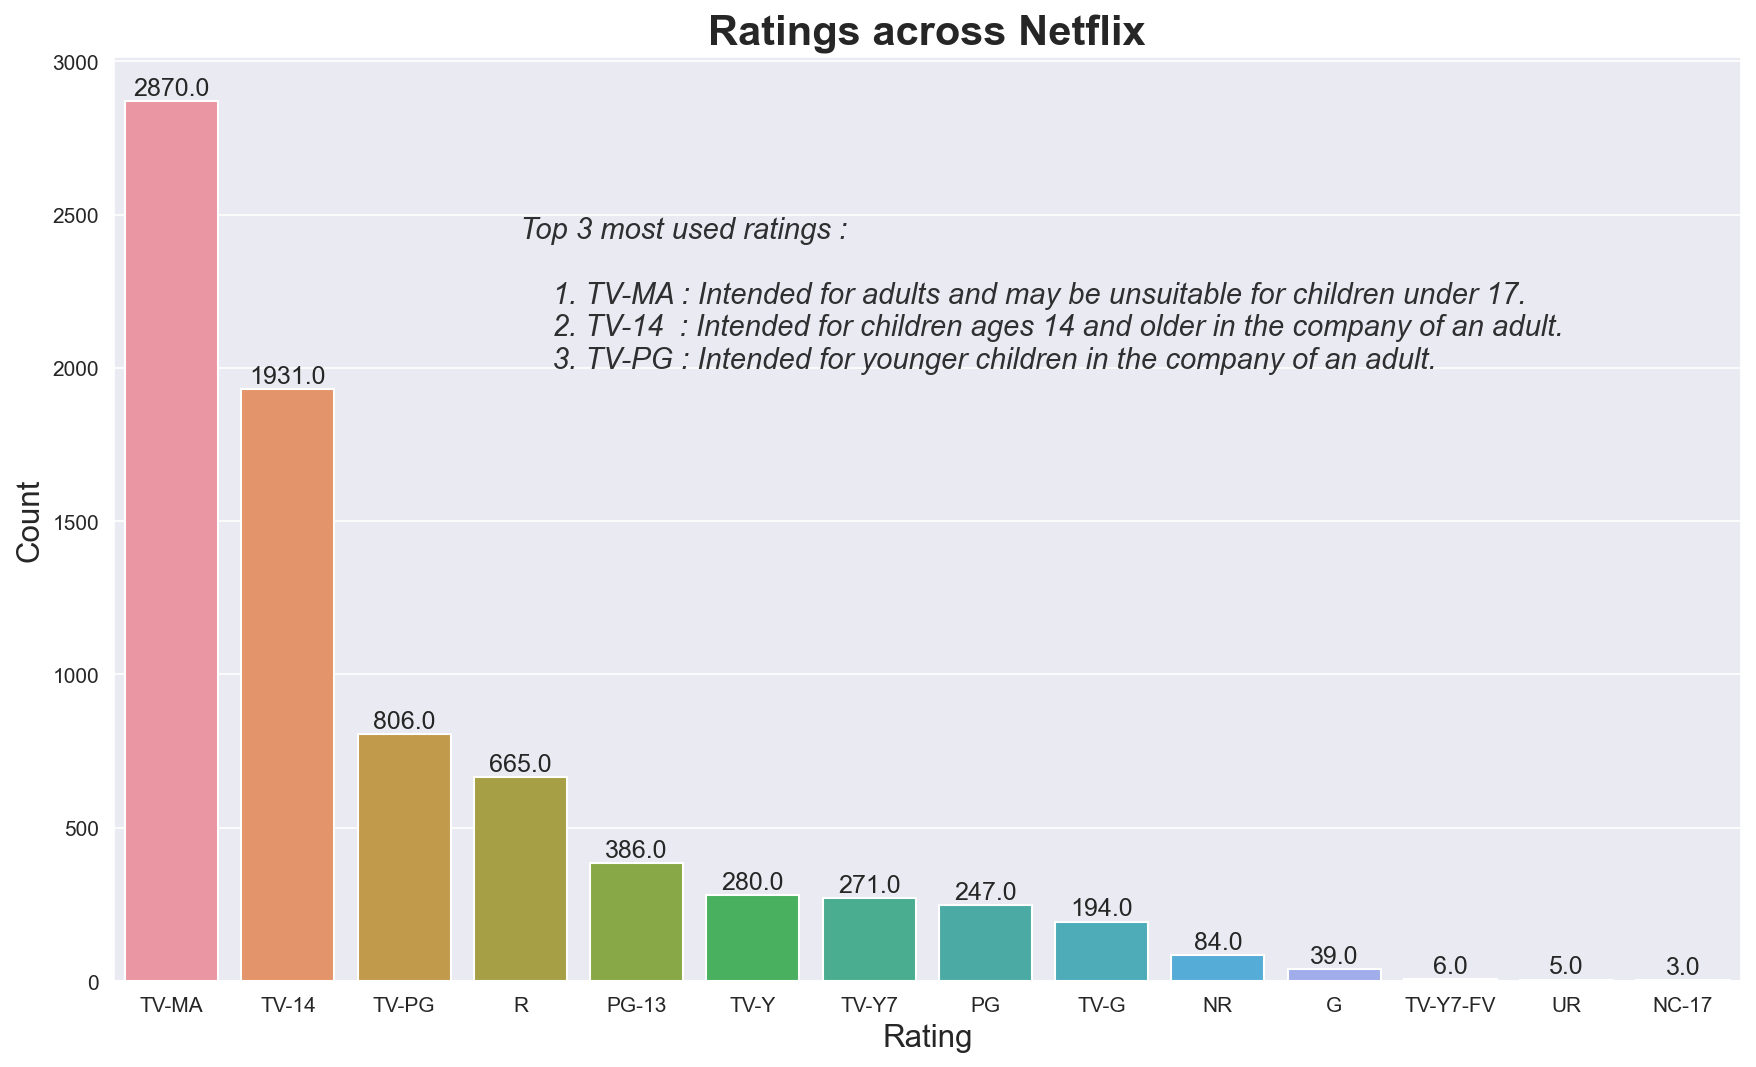

In [47]:
plt.figure(figsize=(14, 8), dpi=150)

graph = sns.countplot(x='rating', data=netflix, order=rat.index)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Ratings across Netflix', fontsize=20, weight='semibold')

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2., height + 20, height, ha="center", fontsize=12)

text3 = 'Top 3 most used ratings :\n\n    1. TV-MA : Intended for adults and may be unsuitable for children under 17.\n    2. TV-14  : Intended for children ages 14 and older in the company of an adult.\n    3. TV-PG : Intended for younger children in the company of an adult.'
plt.text(3, 2000, text3, horizontalalignment='left', fontsize=14, color='black', alpha=0.8, fontstyle='italic')

plt.show()


# The Director

In [53]:
directors_m = nf_movies.director.dropna()
directors_tv = nf_tv.director.dropna()
"""# Check if 'director' column contains lists (if it's a list per entry)
print(directors_m.head())  # This will show if directors_m contains lists

# If it contains lists of directors, explode it
if isinstance(directors_m.iloc[0], list):  # Check if the first entry is a list
    directors_m = directors_m.explode()"""""


"# Check if 'director' column contains lists (if it's a list per entry)\nprint(directors_m.head())  # This will show if directors_m contains lists\n\n# If it contains lists of directors, explode it\nif isinstance(directors_m.iloc[0], list):  # Check if the first entry is a list\n    directors_m = directors_m.explode()"

In [54]:
top_10_movie_dir = pd.DataFrame(directors_m.value_counts().sort_values(ascending=False).head(10))
print(top_10_movie_dir)


                        count
director                     
Raúl Campos, Jan Suter     18
Marcus Raboy               15
Jay Karas                  14
Cathy Garcia-Molina        13
Youssef Chahine            12
Jay Chapman                12
Martin Scorsese            12
Steven Spielberg           10
David Dhawan                9
Kunle Afolayan              8


In [27]:
# Check if 'director' column contains lists (if it's a list per entry)
print(directors_m.head())  # This will show if directors_m contains lists

# If it contains lists of directors, explode it
if isinstance(directors_m.iloc[0], list):  # Check if the first entry is a list
    directors_m = directors_m.explode()


show_id
s2    Jorge Michel Grau
s3         Gilbert Chan
s4          Shane Acker
s5       Robert Luketic
s7      Yasir Al Yasiri
Name: director, dtype: object


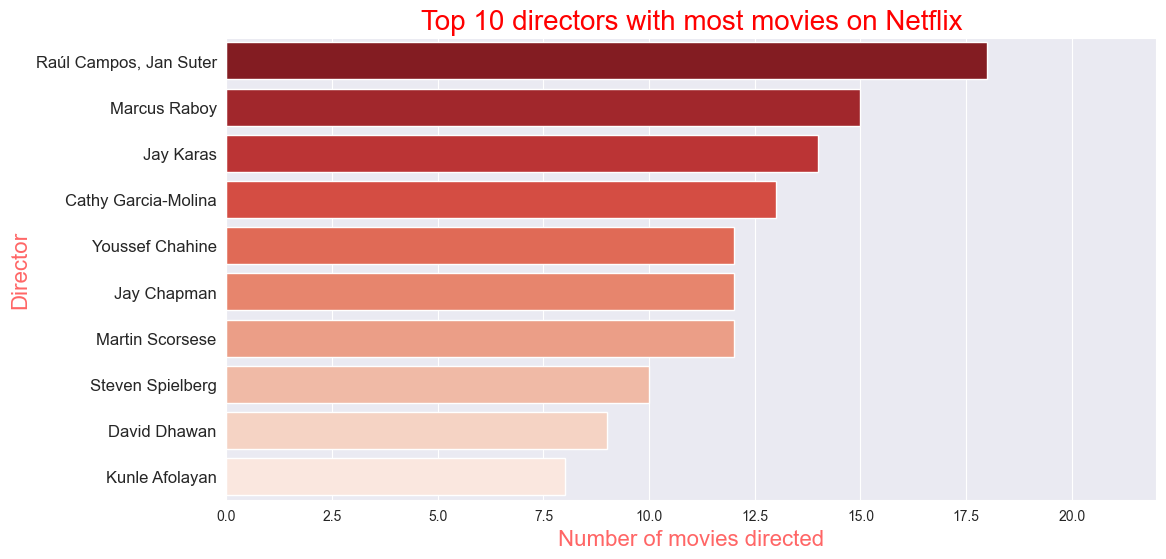

In [56]:
# Rename the column for clarity
top_10_movie_dir.columns = ['movie_count']

# Now plot using the new column name
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(x=top_10_movie_dir['movie_count'], y=top_10_movie_dir.index, palette='Reds_r')

plt.xlim([0, 22])  # Adjust this range based on your data
plt.yticks(fontsize=12)
plt.xlabel('Number of movies directed', fontsize=16, alpha=0.6).set_color('red')
plt.ylabel('Director', fontsize=16, alpha=0.6).set_color('red')
plt.title('Top 10 directors with most movies on Netflix', fontsize=20).set_color('red')

plt.show()


In [57]:
top_10_tv_dir = pd.DataFrame(directors_tv.value_counts().sort_values(ascending=False).head(6))
top_10_tv_dir

,count
director,
Alastair Fothergill,3
Shin Won-ho,2
Iginio Straffi,2
Rob Seidenglanz,2
Stan Lathan,2
Ken Burns,2


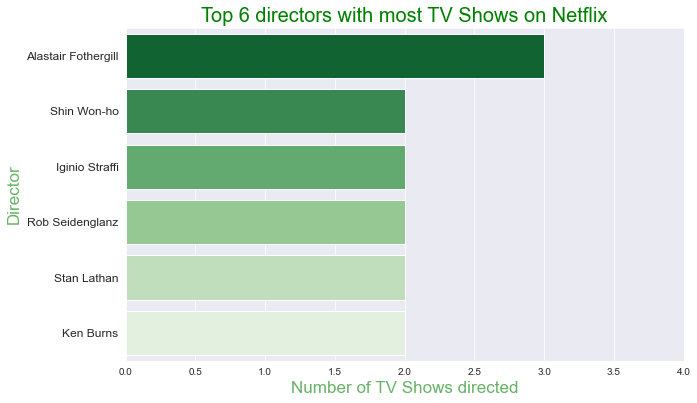

In [59]:

# Rename the column for clarity
top_10_tv_dir.columns = ['tv_show_count']

# Now plot using the new column name
plt.figure(figsize=(10, 6), dpi=72)
sns.barplot(x=top_10_tv_dir['tv_show_count'], y=top_10_tv_dir.index, palette='Greens_r')

plt.yticks(fontsize=12)
plt.xlim([0, 4])
plt.xlabel('Number of TV Shows directed', fontsize=17, alpha=0.6).set_color('green')
plt.ylabel("Director", fontsize=17, alpha=0.6).set_color('green')
plt.title('Top 6 directors with most TV Shows on Netflix', fontsize=20).set_color('green')

plt.show()


# Most casted Actors


In [60]:
actors = pd.DataFrame(netflix.cast.value_counts()[:10])
labels = ['David Attenborough', 'Samuel West', 'Jeff Dunham', 'Kevin Hart',
       'Michela Luci, \n Jamie Watson,\n  Eric Peterson,\n  Anna Claire Bartlam,\n  Nicolas Aqui,\n  Cory Doran,\n  Julie Lemieux,\n  Derek McGrath',
       'Craig Sechler', 'Bill Burr', 'Iliza Shlesinger', 'Jim Gaffigan',
       'Jay O. Sanders']

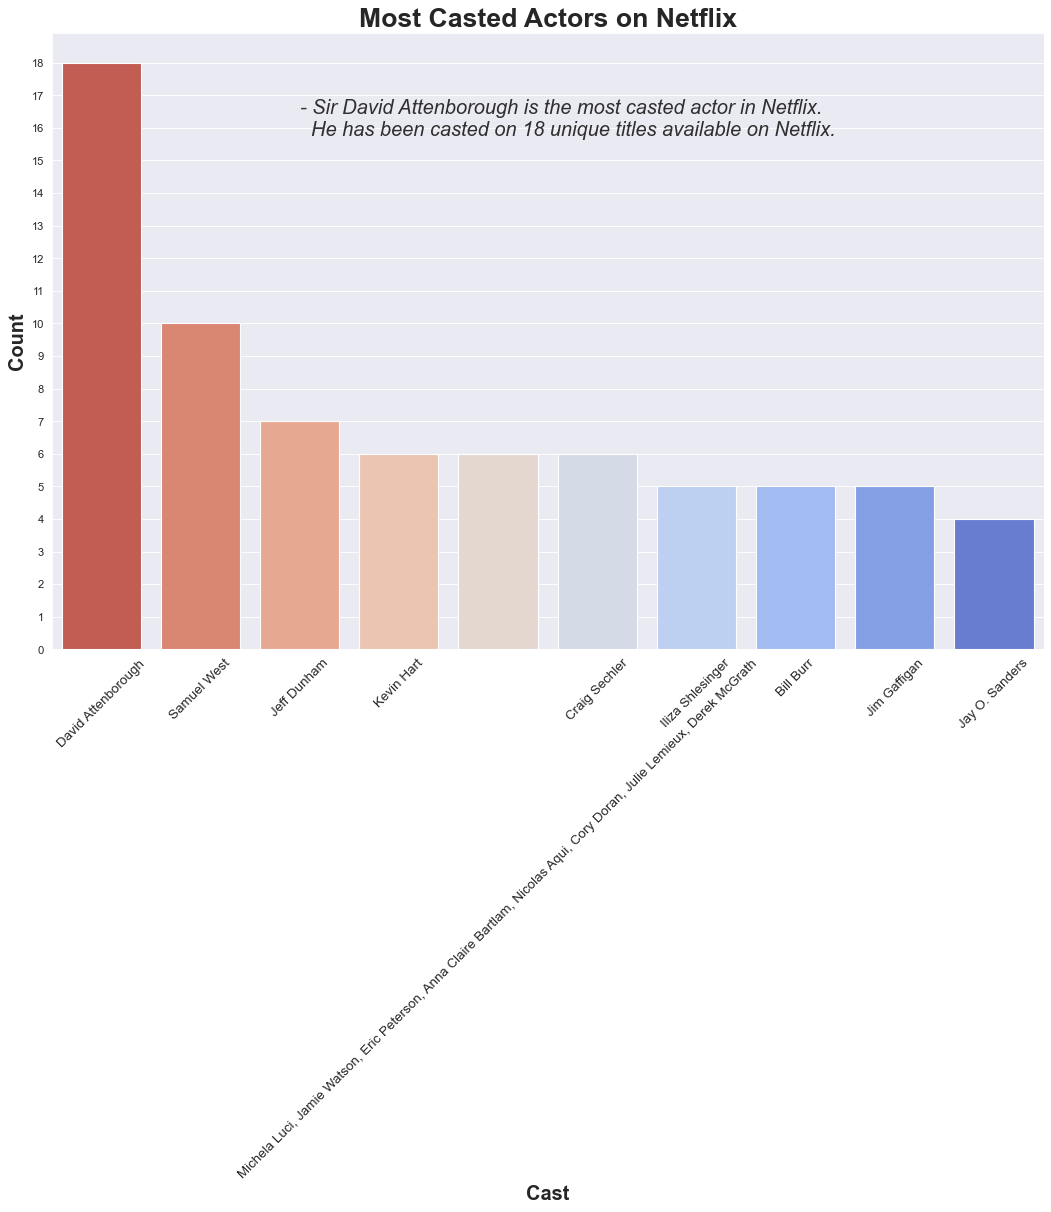

In [67]:
# Create the plot
plt.figure(figsize=(16, 10), dpi=80)

# Bar plot using the actor names as x-axis and the counts as y-axis
sns.barplot(x=actors.index, y=actors.iloc[:, 0], palette='coolwarm_r')

# Set the labels and title
plt.xticks(fontsize=12, rotation=45)
plt.yticks(range(0, 19))
plt.title('Most Casted Actors on Netflix', fontsize=24, weight='semibold')
plt.xlabel('Cast', fontsize=18, weight='semibold')
plt.ylabel('Count', fontsize=18, weight='semibold')

# Add a text annotation to the plot
text4 = '- Sir David Attenborough is the most casted actor in Netflix.\n  He has been casted on 18 unique titles available on Netflix.'
plt.text(2, 15.75, text4, horizontalalignment='left', fontsize=18, color='black', alpha=0.8, fontstyle='italic')

# Show the plot
plt.show()

# Genres

In [68]:
genre_mov  = netflix['listed_in'][netflix.type == 'Movie']
print('Total unique movie genres : {}'.format(genre_mov.value_counts().shape[0]))

genre_tv = netflix['listed_in'][netflix.type == 'TV Show']
print('Total unique TV Shows genres : {}'.format(genre_tv.value_counts().shape[0]))

Total unique movie genres : 265
Total unique TV Shows genres : 227


In [69]:
genre_m = pd.DataFrame(genre_mov.value_counts()[:10])
genre_m

,count
listed_in,
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
Children & Family Movies,177
"Documentaries, International Movies",172
"Children & Family Movies, Comedies",169
"Comedies, International Movies",161


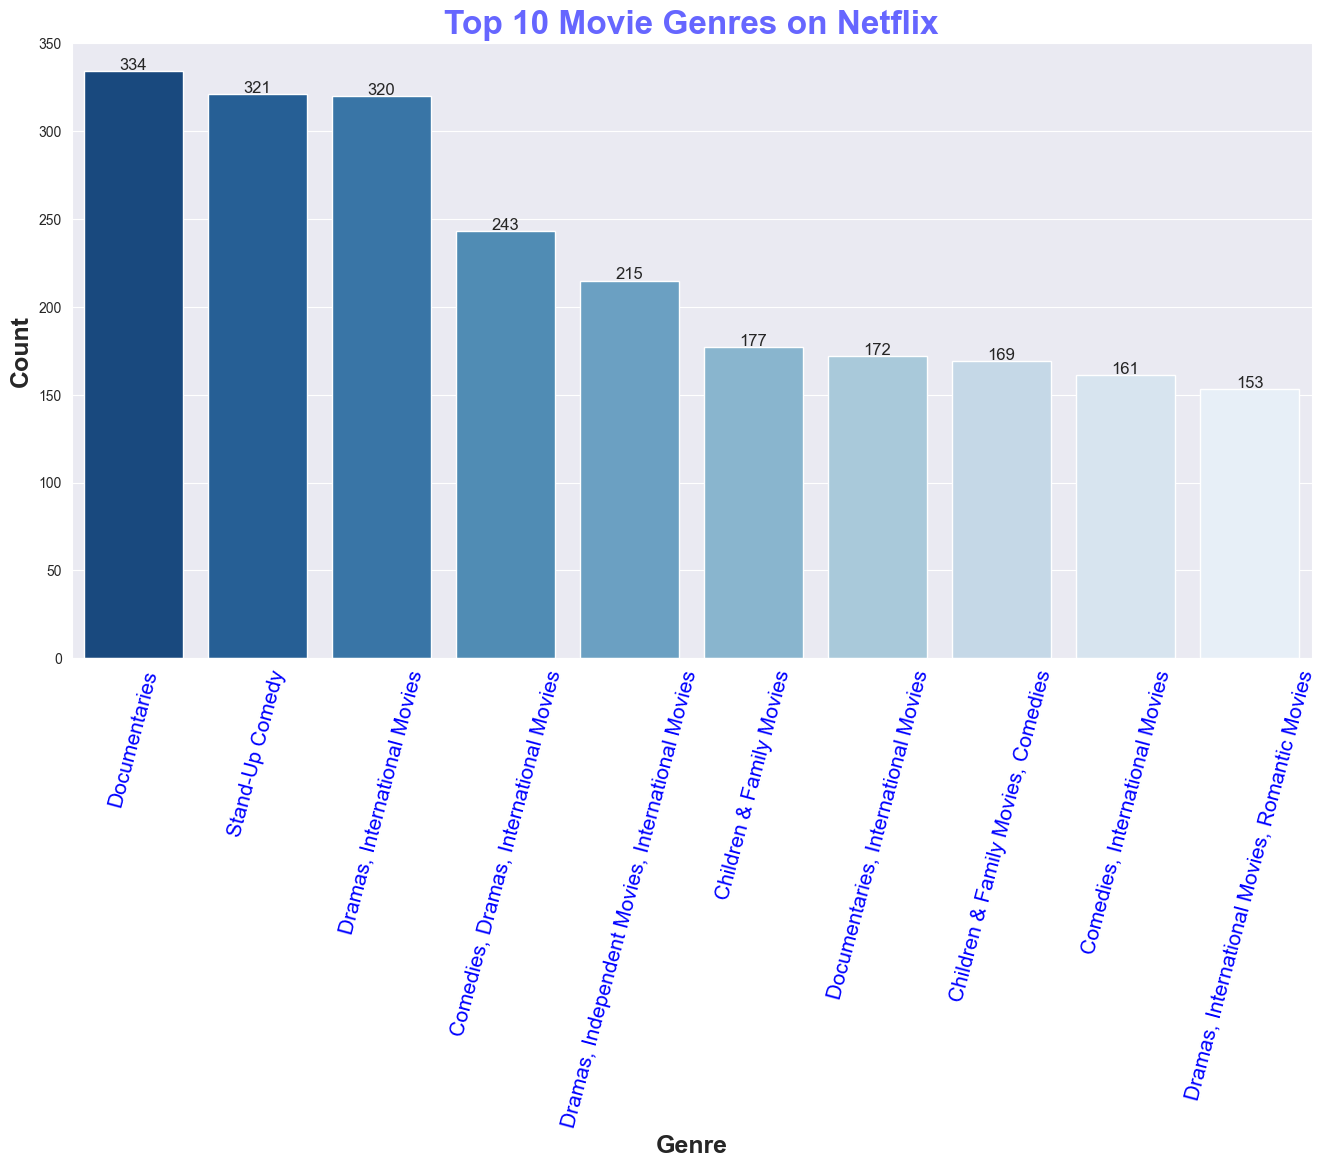

In [76]:
# Correct the figure size and plot
plt.figure(figsize=(16,8), dpi=100)

# Create a barplot using the index (genre) as the x-axis and the count as the y-axis
graph = sns.barplot(x=genre_m.index, y=genre_m.values.flatten(), palette='Blues_r')

# Customize the x-axis ticks, title, and labels
plt.xticks(fontsize=15, rotation=75, color='b')
plt.title('Top 10 Movie Genres on Netflix', fontsize=24, weight='semibold', color='b', alpha=0.6)
plt.xlabel('Genre', fontsize=18, weight='semibold')
plt.ylabel('Count', fontsize=18, weight='semibold')

# Annotate the bars with the corresponding counts
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha="center", fontsize=12)

# Show the plot
plt.show()


In [77]:
genre_tv = pd.DataFrame(genre_tv.value_counts()[:10])
genre_tv

,count
listed_in,
Kids' TV,205
"International TV Shows, TV Dramas",111
"Crime TV Shows, International TV Shows, TV Dramas",106
"Kids' TV, TV Comedies",90
"International TV Shows, Romantic TV Shows, TV Dramas",86
Reality TV,83
"International TV Shows, Romantic TV Shows, TV Comedies",79
"Anime Series, International TV Shows",75
Docuseries,74


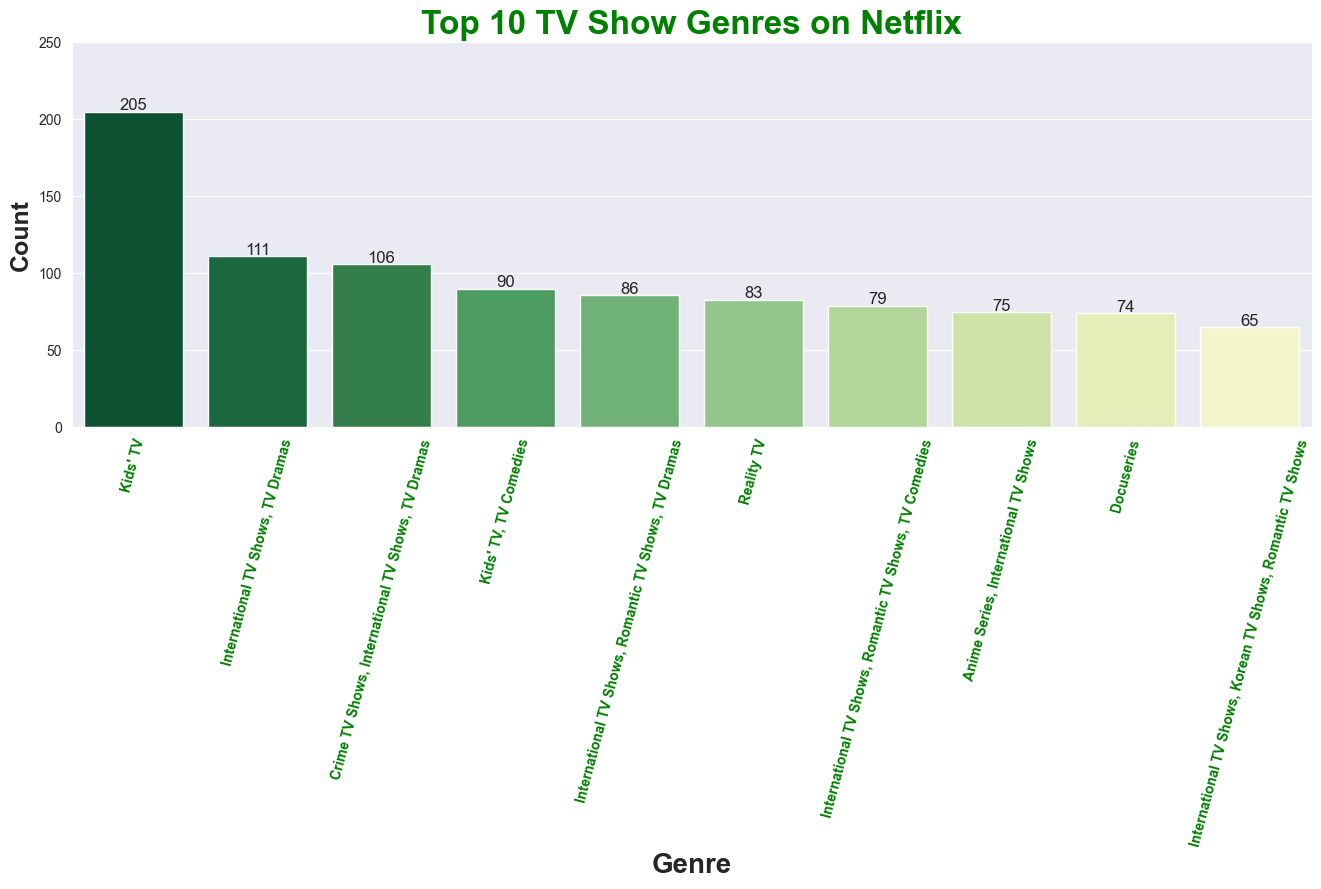

In [81]:
plt.figure(figsize=(16, 5), dpi=100)

# Create the barplot using the 'listed_in' index for the x-axis and 'count' as the y-axis
graph = sns.barplot(x=genre_tv.index, y=genre_tv['count'], palette='YlGn_r')

# Customize the x-axis ticks, title, and labels
plt.xticks(fontsize=10, rotation=75, color='g', weight='semibold')
plt.title('Top 10 TV Show Genres on Netflix', fontsize=24, weight='semibold', color='g')
plt.xlabel('Genre', fontsize=20, weight='semibold')
plt.ylabel('Count', fontsize=18, weight='semibold')
plt.ylim([0, 250])

# Annotate the bars with the corresponding counts
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", fontsize=12)

# Show the plot
plt.show()


# Movies and TV Shows across the years

In [82]:
release_m = pd.DataFrame(nf_movies.release_year.value_counts()).sort_index()
release_tv = pd.DataFrame(nf_tv.release_year.value_counts()).sort_index()
print(release_m.head(3))
print(release_tv.head(3))

              count
release_year       
1942              2
1943              3
1944              3
              count
release_year       
1925              1
1946              1
1963              1


f:\maidan\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\maidan\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


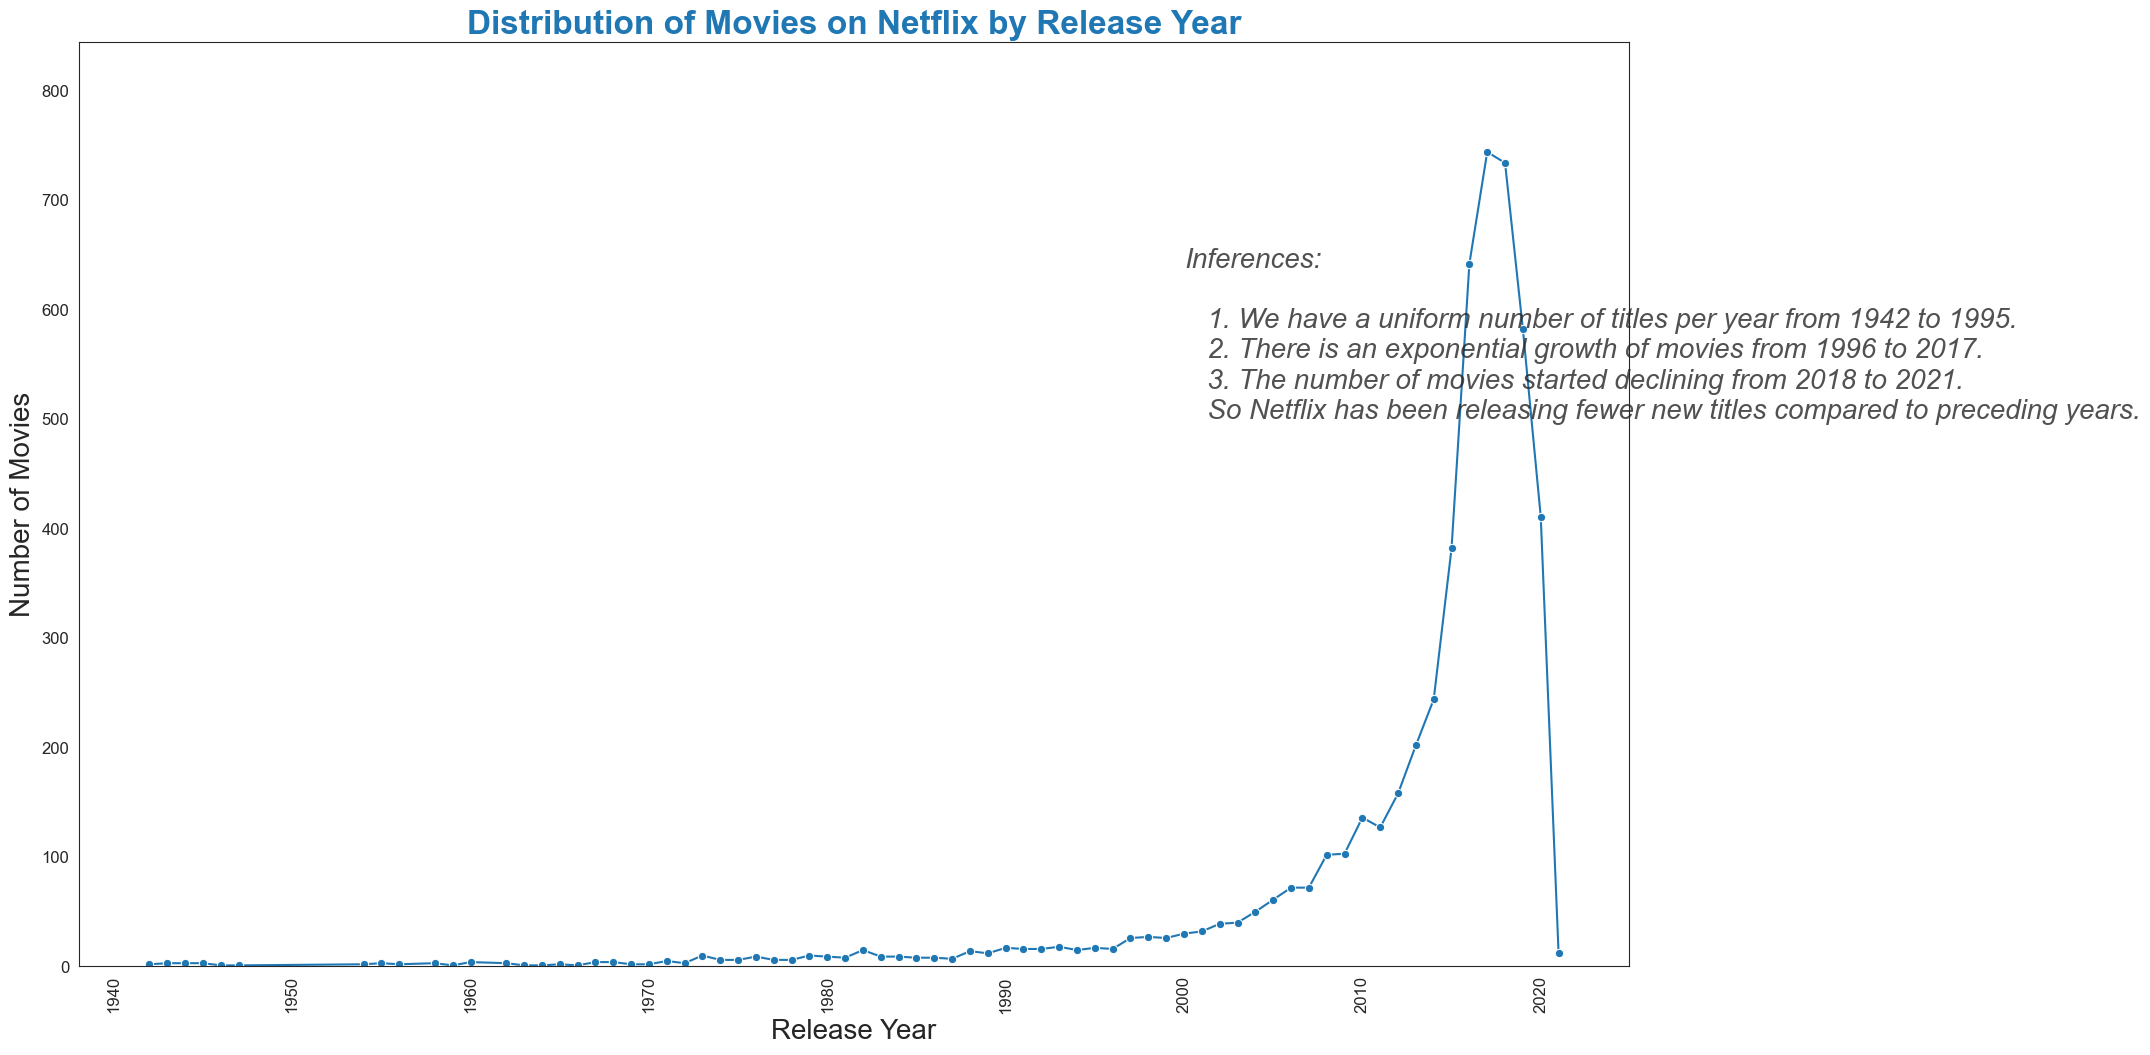

In [88]:
plt.figure(figsize=(20, 12), dpi=100)
sns.set_style('white')

# Use a line plot to show the trend over the years
sns.lineplot(x=release_m.index, y=release_m['count'], marker='o', color='tab:blue')

# Customize the plot
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Release Year', fontsize=20)
plt.ylabel('Number of Movies', fontsize=20)
plt.title('Distribution of Movies on Netflix by Release Year', fontsize=24, weight='bold', color='tab:blue')

# Adjust the y-axis range to ensure the graph is fully visible
plt.ylim(0, release_m['count'].max() + 100)

# Add inferences text at a more visible location
text5 = 'Inferences:\n\n   1. We have a uniform number of titles per year from 1942 to 1995.\n   2. There is an exponential growth of movies from 1996 to 2017.\n   3. The number of movies started declining from 2018 to 2021.\n   So Netflix has been releasing fewer new titles compared to preceding years.'
plt.text(2000, 500, text5, horizontalalignment='left', fontsize=20, fontstyle='italic', alpha=0.8)

# Show the plot
plt.show()


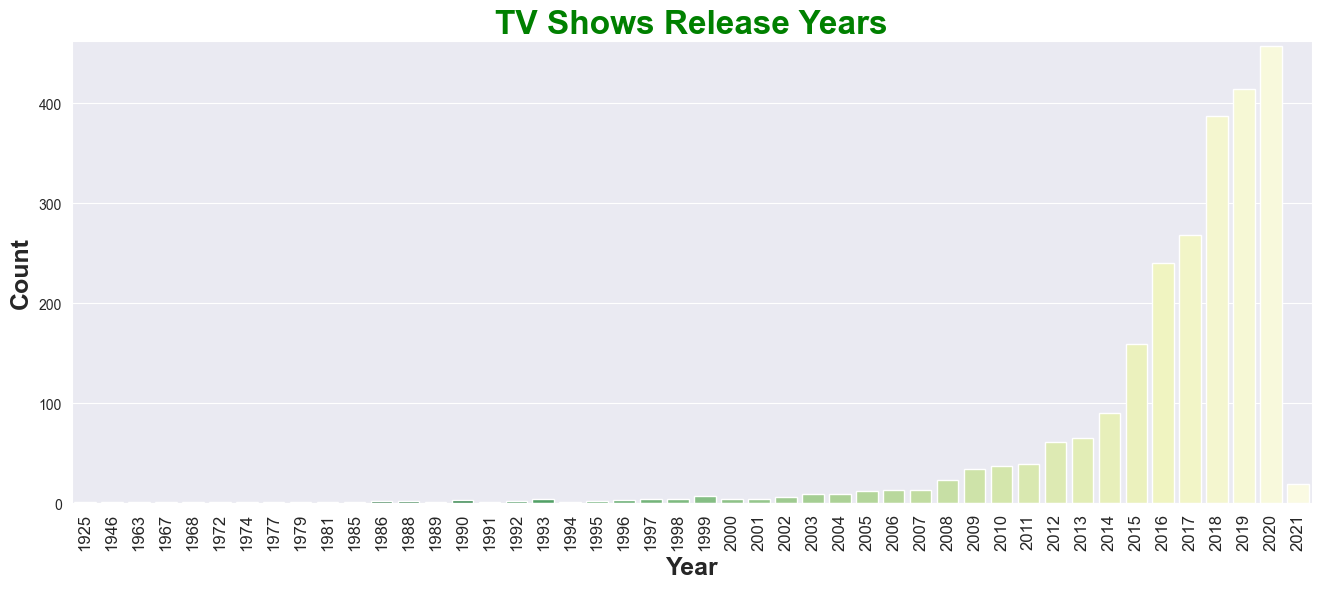

In [84]:
plt.figure(figsize=(16, 6), dpi=100)

# Create the bar plot for TV show release years
sns.barplot(x=release_tv.index, y=release_tv['count'], palette='YlGn_r')

# Customize the plot
plt.title('TV Shows Release Years', fontsize=24, weight='semibold', color='g')
plt.xlabel('Year', fontsize=18, weight='semibold')
plt.ylabel('Count', fontsize=18, weight='semibold')
plt.xticks(rotation=90, fontsize=12)
plt.ylim(0, max(release_tv['count']) + 5)

# Show the plot
plt.show()


f:\maidan\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\maidan\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


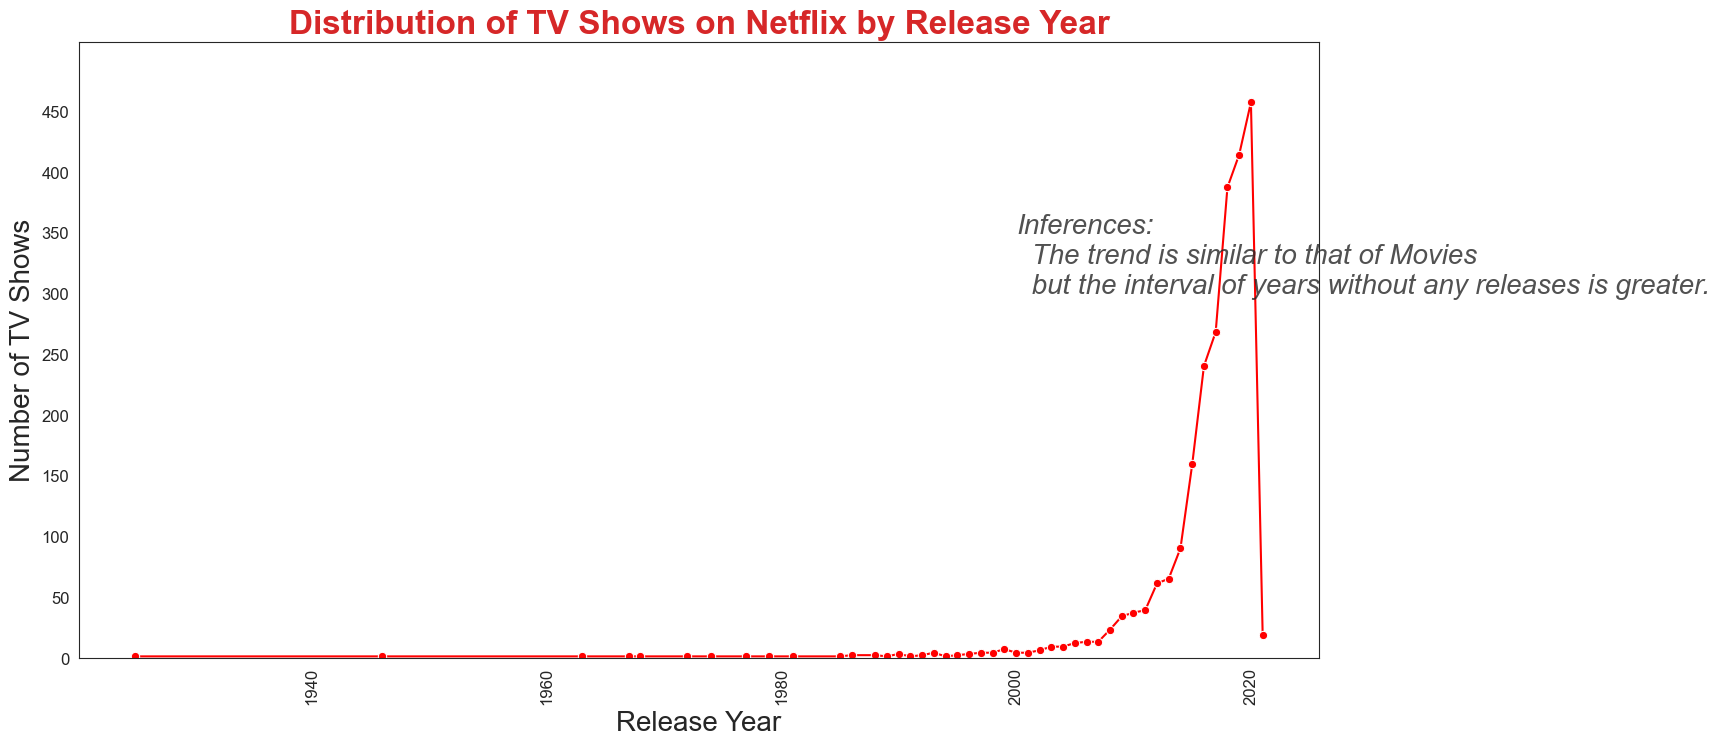

In [89]:
plt.figure(figsize=(16,8), dpi=100)

# Plot the TV shows using count of shows by year
sns.lineplot(x=release_tv.index, y=release_tv['count'], marker='o', color='r')

# Customize the plot
plt.xticks(rotation=90, fontsize=12)
plt.yticks(range(0, 500, 50), fontsize=12)
plt.xlabel('Release Year', fontsize=20)
plt.ylabel('Number of TV Shows', fontsize=20)
plt.title('Distribution of TV Shows on Netflix by Release Year', fontsize=24, weight='bold', color='tab:red')

# Adjust the y-axis range to ensure visibility
plt.ylim(0, release_tv['count'].max() + 50)

# Add inferences text at a more visible location
text6 = 'Inferences:\n  The trend is similar to that of Movies\n  but the interval of years without any releases is greater.'
plt.text(2000, 300, text6, horizontalalignment='left', fontsize=20, fontstyle='italic', alpha=0.8)

# Show the plot
plt.show()


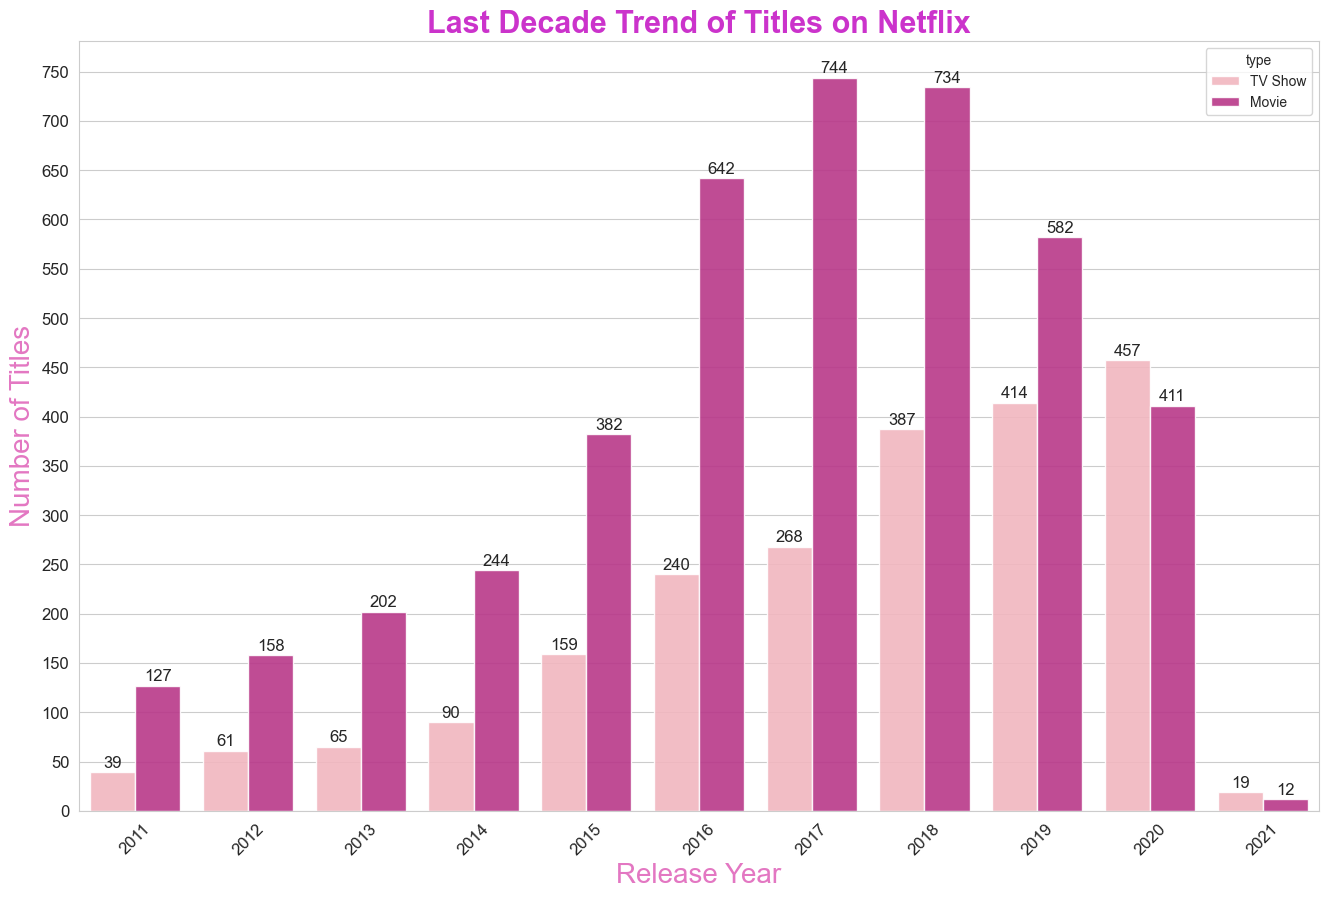

In [91]:
# Filter the dataset for the last decade (2011-2021)
decade = netflix[netflix.release_year > 2010]

# Plot setup
plt.figure(figsize=(16,10), dpi=100)
sns.set_style('whitegrid')

# Create a countplot with 'hue' to differentiate between 'type'
graph = sns.countplot(x="release_year", data=decade, hue="type", palette='RdPu', alpha=0.9)

# Customize the axes and titles
plt.xticks(rotation=45, fontsize=12)
plt.yticks(range(0, 800, 50), fontsize=12)
plt.xlabel('Release Year', fontsize=20, color='tab:pink')
plt.ylabel('Number of Titles', fontsize=20, color='tab:pink')
plt.title('Last Decade Trend of Titles on Netflix', fontsize=22, color='m', weight='bold', alpha=0.8)

# Add text annotations for each bar
for p in graph.patches:
    height = p.get_height()
    # Place the count text in a visible location above each bar
    graph.text(p.get_x() + p.get_width()/2., height + 5, int(height), ha="center", fontsize=12)

# Show the plot
plt.show()


## Content added on netflix over the years

In [92]:
added    = pd.DataFrame(netflix.year_added.value_counts()).sort_index()
added_m  = pd.DataFrame(nf_movies.year_added.value_counts()).sort_index()
added_tv = pd.DataFrame(nf_tv.year_added.value_counts()).sort_index()

In [97]:
plot1 = go.Scatter(
    y=added_m['count'], 
    x=added_m.index, 
    name="Movies", 
    marker=dict(color="blue")
)

plot2 = go.Scatter(
    y=added_tv['count'], 
    x=added_tv.index, 
    name="TV Shows", 
    marker=dict(color="green")
)

plot3 = go.Scatter(
    y=added['count'], 
    x=added.index, 
    name="Total Content", 
    marker=dict(color="red")
)

data = [plot1, plot2, plot3]

layout = go.Layout(
    title="Content Added on Netflix Over the Years", 
    margin=dict(l=20, b=20), 
    legend=dict(x=0.01, y=0.98, orientation='v')
)

fig = go.Figure(data, layout=layout)
fig.show()


# Content by countries

In [98]:
country = pd.DataFrame(netflix.country.value_counts()[:15])

In [102]:
fig = px.pie(country, values=country['count'], names=country.index, title='Total Netflix Content by Countries', height=800, width=800)
fig.show()
